In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 设置字体
plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
# 读入数据
car_data = pd.read_csv("./car_evaluation.csv",names=["buying","maint","doors","persons","lug_boot","safety","car_Eva"])

In [4]:
# 查看数据信息，发现所有的数据都是 object 类型，无法直接操作，需要对数据转换数据类型
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_Eva   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,car_Eva
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# 查看buying的各value的数值
car_data.buying.value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [7]:
# 编码buying:{"vhigh":0,"high":1,"med":2,"low":3}
car_data["buying"]=car_data.buying.map({"vhigh":0,"high":1,"med":2,"low":3})

In [8]:
# 可以看到buying有1728个，数据类型是int类型，表示编码成功
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_Eva   1728 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.6+ KB


In [9]:
# 查看maint的各value的数值
car_data.maint.value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

In [10]:
# 对maint进行编码:{"vhigh":0,"high":1,"med":2,"low":3}
car_data["maint"] = car_data.maint.map({"vhigh":0,"high":1,"med":2,"low":3})

In [11]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   int64 
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_Eva   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [12]:
# 查看doors的各value的数值
car_data.doors.value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [13]:
# 对doors进行编码:{"5more":0,"4":1,"3":2,"2":3}
car_data["doors"] = car_data.doors.map({"5more":0,"4":1,"3":2,"2":3})

In [14]:
# 查看persons的值的数值
car_data.persons.value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [15]:
# 对persons进行编码:{"more":0,"4":1,"2":2}
car_data["persons"] = car_data.persons.map({"more":0,"4":1,"2":2})

In [16]:
# 查看lug_boot的各数据的值
car_data.lug_boot.value_counts()

small    576
med      576
big      576
Name: lug_boot, dtype: int64

In [17]:
# 对lug_boot 进行编码：{"big":0,"med":1,"small":2 }
car_data["lug_boot"] = car_data["lug_boot"].map({"big":0,"med":1,"small":2
                                                })

In [18]:
# 查看safety 的值
car_data.safety.value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

In [19]:
# 对safety进行编码：{"high":0,"med":1,"low":2}
car_data["safety"] = car_data["safety"].map({"high":0,"med":1,"low":2})

In [20]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   int64 
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   int64 
 5   safety    1728 non-null   int64 
 6   car_Eva   1728 non-null   object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


In [21]:
car_data.car_Eva.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: car_Eva, dtype: int64

In [22]:
# 对car_Eva进行编码：{"unacc":0,"acc":1,"good":1,"vgood":1}把不满意的都用0代替，满意的用1代替
car_data["car_Eva"] = car_data["car_Eva"].map({"unacc":0,"acc":1,"good":1,"vgood":1})

In [23]:
#编码完毕
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   car_Eva   1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [24]:
# 指定X数据集
X = car_data.drop("car_Eva",axis=1)

In [25]:
# 指定Y数据集
Y =car_data[["car_Eva"]]

In [26]:
# 进行数据集的划分
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.7,random_state=1)

In [27]:
# 使用逻辑回归的分类方法
lr = LogisticRegression()

In [28]:
# 开始训练模型
lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
# 预测模型
y_pred_test = lr.predict(x_test)

In [30]:
# 打印准确率，召回率，f1得分
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       854
           1       0.80      0.74      0.77       356

    accuracy                           0.87      1210
   macro avg       0.85      0.83      0.84      1210
weighted avg       0.87      0.87      0.87      1210



In [31]:
y_pred_train = lr.predict(X_train)

In [32]:
print(classification_report(Y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       356
           1       0.80      0.72      0.76       162

    accuracy                           0.86       518
   macro avg       0.84      0.82      0.83       518
weighted avg       0.85      0.86      0.85       518



In [33]:
confusion_matrix(Y_train,y_pred_train)

array([[326,  30],
       [ 45, 117]], dtype=int64)

In [34]:
confusion_matrix(y_test,y_pred_test)

array([[787,  67],
       [ 93, 263]], dtype=int64)

Text(0.5, 1.0, '混淆矩阵热力图')

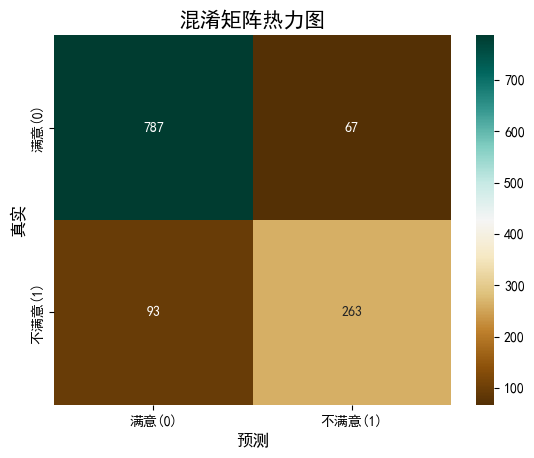

In [35]:
# 绘制热力图：annot=True表示显示数值，fmt="d"表示显示的是非科学计数法，cmap="BrBG"指定配色
ax= sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True,fmt="d",cmap='BrBG',
           xticklabels=["满意(0)","不满意(1)"],
           yticklabels=["满意(0)","不满意(1)"])
ax.set_ylabel('真实',fontsize=12)
ax.set_xlabel("预测",fontsize=12)
ax.set_title("混淆矩阵热力图",fontsize=15)

In [36]:
# 单独打印正确率得分
print(round(accuracy_score(y_pred_test,y_test),4))

0.8678


In [37]:
# 单独打印f1得分
print(round(f1_score(y_pred_test,y_test),4))

0.7668


In [38]:
# 单独打印精确率得分
print(round(precision_score(y_pred_test,y_test),4))

0.7388


In [39]:
# 单独打印召回率得分
print(round(recall_score(y_pred_test,y_test),4))

0.797
